In [1]:
# Upload file from local drive
from google.colab import files
uploaded = files.upload()

In [2]:
import math
import numpy as np
import pandas as pd

OD = pd.read_csv('data.csv', index_col=False,)
OD.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
OD.shape

(569, 33)

In [4]:
OD.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Review data types with "info()". Check if any missing or NaN values
OD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
OD.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [7]:
# Unnamed column have a NaN values, I drop it
OD.drop('Unnamed: 32', axis=1, inplace=True)
# Id column is redundant and not useful, I drop it
OD.drop('id', axis=1, inplace=True)
OD.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
OD.diagnosis.unique()

array(['M', 'B'], dtype=object)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


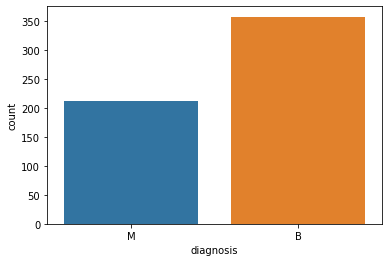

In [9]:
import seaborn as sns
sns.countplot(OD['diagnosis'], label = "Count")

In [10]:
# Mapping target variable to 1 and 0
OD['diagnosis'].replace({'M':1, 'B':0}, inplace=True)
OD.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


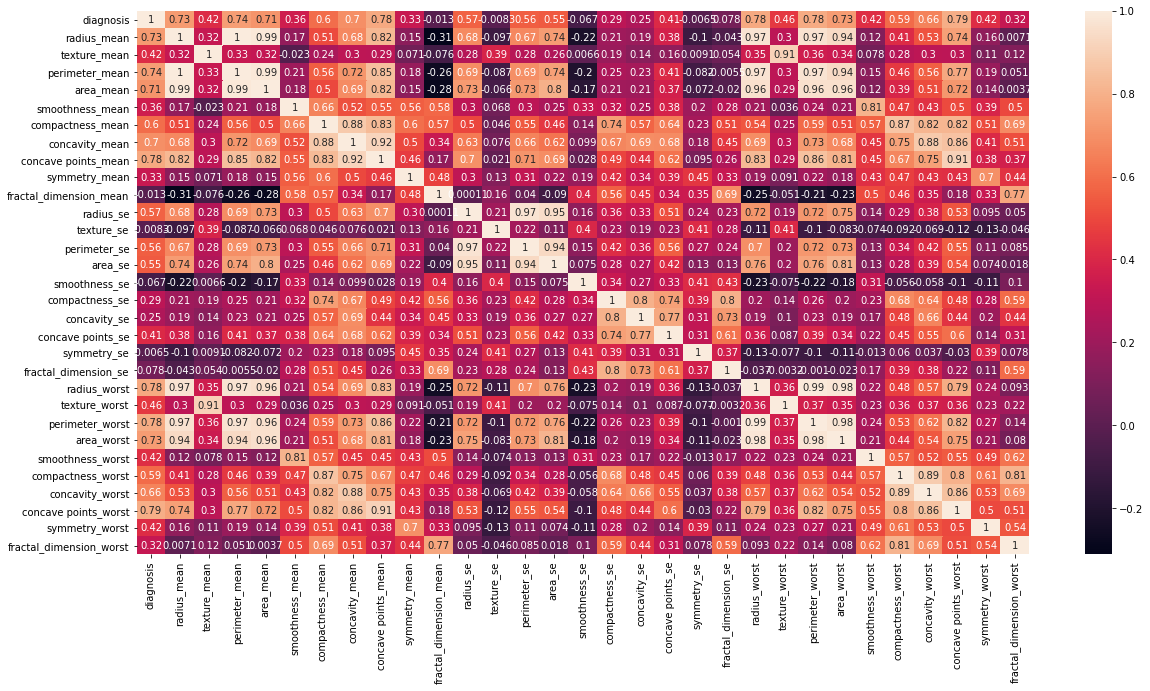

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
OD_corr = OD.corr()
sns.heatmap(OD_corr, annot=True)

In [12]:
# OD - Split Data

X_OD = OD.drop('diagnosis',axis=1).values
y_OD = OD['diagnosis'].values

# split data into training and testing with a ratio of 80:20 using sklearn
from sklearn.model_selection import train_test_split

X_OD_train, X_OD_test, y_OD_train, y_OD_test = train_test_split(X_OD, y_OD, test_size = 0.20, random_state=5)

print("X Train:", X_OD_train.shape, "\nX Test:", X_OD_test.shape, "\nY Train:", y_OD_train.shape, "\nY Test:", y_OD_test.shape)

X Train: (455, 30) 
X Test: (114, 30) 
Y Train: (455,) 
Y Test: (114,)


In [0]:
# Min-Max Normalization
from mlxtend.preprocessing import minmax_scaling

ND = minmax_scaling(OD, columns = OD.columns.values)

In [14]:
# ND - Split Data

X_ND = ND.drop('diagnosis',axis=1).values
y_ND = ND['diagnosis'].values

# split data into training and testing with a ratio of 80:20 using sklearn
from sklearn.model_selection import train_test_split

X_ND_train, X_ND_test, y_ND_train, y_ND_test = train_test_split(X_ND, y_ND, test_size = 0.20, random_state=5)

print("X_ND Train:", X_ND_train.shape, "\nX_ND Test:", X_ND_test.shape, "\nY_ND Train:", y_ND_train.shape, "\nY_ND Test:", y_ND_test.shape)

X_ND Train: (455, 30) 
X_ND Test: (114, 30) 
Y_ND Train: (455,) 
Y_ND Test: (114,)


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score

# KMeans Clustering: k = 2 > Malignant or Benign

k_mean_OD = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
OD_kmean = k_mean_OD.fit_predict(OD)
OD["type"] = OD_kmean # I write cluster values to OD dataset.
print("Silhouette Score: ", silhouette_score(OD, OD_kmean))
print("Accuracy Score: ", accuracy_score(y_OD, OD_kmean))

Silhouette Score:  0.6972644715687979
Accuracy Score:  0.8541300527240774


In [16]:
# KMeans Clustering: k = 2 > Malignant or Benign

k_mean_ND = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
ND_kmean = k_mean_ND.fit_predict(ND)
ND["type"] = ND_kmean # I write cluster values to ND dataset.
print("Silhouette Score: ", silhouette_score(ND, ND_kmean))
print("Accuracy Score: ", accuracy_score(y_ND, ND_kmean))

Silhouette Score:  0.5765491776424883
Accuracy Score:  0.9982425307557118


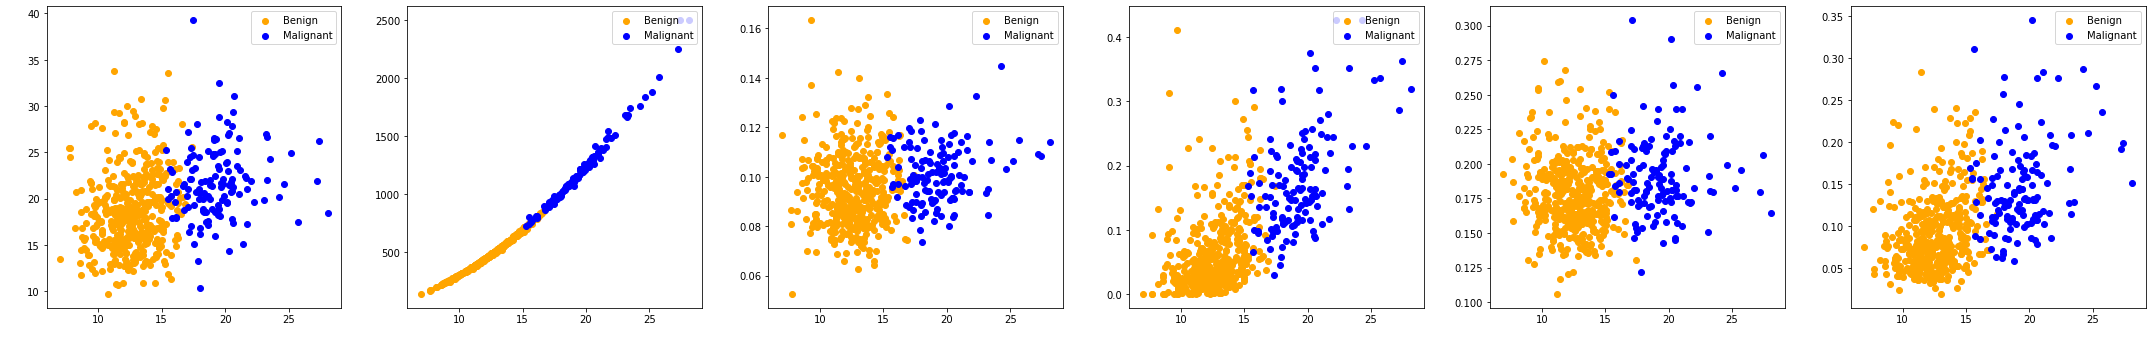

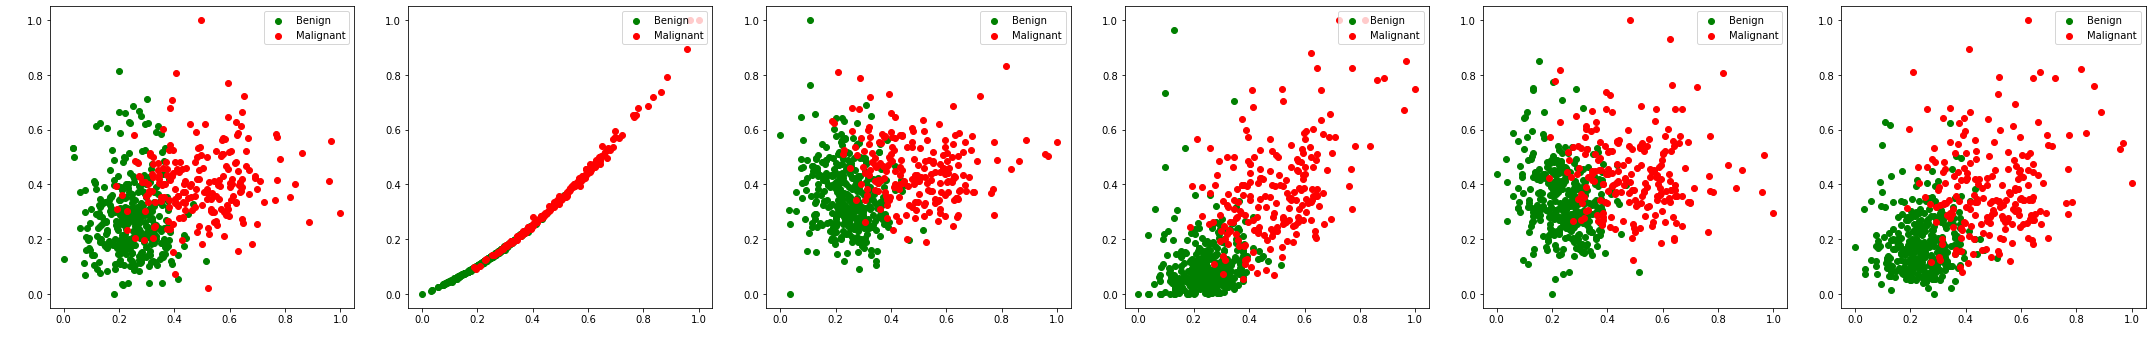

In [41]:
# Visualizing the clusters radius_mean with some other features
some_features = [ 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'compactness_mean' ]

fig, axs = plt.subplots(nrows=1, ncols=len(some_features), figsize=(len(some_features) * 5, 5))

fig.subplots_adjust(top=1.88)
i = 0
for feature in some_features:
    axs[i].set_xlabel('radius_mean', fontsize = 15.0, color = "white")
    axs[i].set_ylabel(feature, fontsize = 15.0, color = "white")
    axs[i].scatter(x = OD.loc[OD['type'] == 0, 'radius_mean'], y = OD.loc[OD['type'] == 0, feature], c = 'orange', label = 'Benign')
    axs[i].scatter(x = OD.loc[OD['type'] == 1, 'radius_mean'], y = OD.loc[OD['type'] == 1, feature], c = 'blue', label = 'Malignant')
    axs[i].legend(loc = 'upper right')
    i += 1
fig.tight_layout()

fig1, axs1 = plt.subplots(nrows=1, ncols=len(some_features), figsize=(len(some_features) * 5, 5))
i = 0
for feature in some_features:
    axs1[i].set_xlabel('radius_mean', fontsize = 15.0, color = "white")
    axs1[i].set_ylabel(feature, fontsize = 15.0, color = "white")
    axs1[i].scatter(x = ND.loc[ND['type'] == 0, 'radius_mean'], y = ND.loc[ND['type'] == 0, feature], c = 'green', label = 'Benign')
    axs1[i].scatter(x = ND.loc[ND['type'] == 1, 'radius_mean'], y = ND.loc[ND['type'] == 1, feature], c = 'red', label = 'Malignant')
    axs1[i].legend(loc = 'upper right')
    i += 1
fig1.tight_layout()

In [42]:
# Train our model using SVM algorithm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_OD_train, y_OD_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        66
           1       1.00      0.85      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



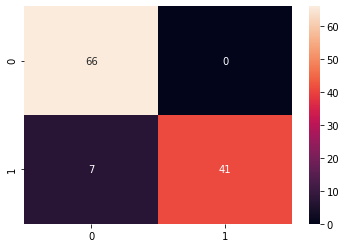

In [43]:
# Predict using the trained model
y_OD_predict = svc_model.predict(X_OD_test)
# Create confusion matrix
cm = confusion_matrix(y_OD_test, y_OD_predict)
# Prepare heatmap
sns.heatmap(cm, annot= True)

print(classification_report(y_OD_test, y_OD_predict))

In [20]:
# ND dataset classification
svc_model = SVC()
svc_model.fit(X_ND_train, y_ND_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        66
         1.0       1.00      0.96      0.98        48

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



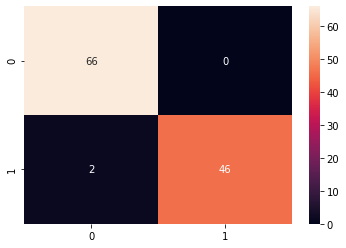

In [21]:
# Predict using the trained model
y_ND_predict = svc_model.predict(X_ND_test)
# Create confusion matrix
cm = confusion_matrix(y_ND_test, y_ND_predict)
# Prepare heatmap
sns.heatmap(cm, annot= True)

print(classification_report(y_ND_test,y_ND_predict))